In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
% matplotlib inline
from matplotlib import rc
rc('text', usetex=True)
from pylab import rcParams
rcParams['figure.figsize'] = 10,8

In [2]:
dist_uncert = 0.05 #in meters
time_uncert = 4*(10**(-9)) #in seconds

In [3]:
def linearFit(t, m): 
    return m*t

#defines linear fit function

In [4]:
data = np.genfromtxt('rawData.csv', delimiter = ',', skip_header=True)
#imports data from text file

In [5]:
print(data)

[[  1.06854000e+02   3.68000000e-07]
 [  9.68540000e+01   3.40000000e-07]
 [  8.68540000e+01   3.16000000e-07]
 [  7.68540000e+01   3.00000000e-07]
 [  6.60000000e+01   2.78000000e-07]
 [  5.60000000e+01   2.60000000e-07]
 [  4.60000000e+01   2.40000000e-07]
 [  3.60000000e+01   2.18000000e-07]
 [  2.60000000e+01   1.98000000e-07]
 [  1.60000000e+01   1.80000000e-07]]


In [6]:
xInFeet = data[ :, 0]
tInS = data[ :, 1]
dx = [] #total change in distance travelled by the light in meters
dt = [] #change in time

In [7]:
i = 0
for i in range(len(xInFeet)):
    dx.append(2*0.3048*(xInFeet[i]-xInFeet[9]))
    i+=1
print (dx)
# calculates the total change in distance (twice the mirror's change) and converts it to meters

[55.384598400000002, 49.288598400000005, 43.192598400000001, 37.096598400000005, 30.48, 24.384, 18.288, 12.192, 6.0960000000000001, 0.0]


In [8]:
j = 0
for j in range(len(tInS)):
    dt.append(tInS[j]-tInS[9])
    j+=1
print (dt)
#calculates the change in time

[1.8800000000000002e-07, 1.5999999999999998e-07, 1.3600000000000003e-07, 1.1999999999999999e-07, 9.7999999999999978e-08, 8.0000000000000002e-08, 5.9999999999999981e-08, 3.7999999999999996e-08, 1.8000000000000002e-08, 0.0]


In [9]:
dx = np.array(dx)
dt = np.array(dt)
#transforms dx and dt from lists into arrays to allow the curvefit function to work properly

Uncertainties: $\Delta x = \pm 0.05m$, $\Delta t = \pm 4 ns$

$c = \frac{dx}{dt}$

$\Delta c = \sqrt{(\frac{\partial c}{\partial x}\Delta x)^2 + (\frac{\partial c}{\partial t}\Delta t)^2}$

$\Delta c = \sqrt{(\frac{1}{t}0.05)^2 + (-xt^{-2}4\times10^{-9})^2}$

In [10]:
uncertaintyInC = []

In [11]:
k=0
for k in range(len(dx)-1):
    uncertaintyInC.append(np.sqrt(((dist_uncert/dt[k])**2)+((dx[k]*dt[k])**(-2)*time_uncert)**2))
    k+=1
print(uncertaintyInC)

[265957.44936762907, 312500.00661872228, 367647.07709888852, 416666.71555889887, 510204.27859437, 625000.88395450986, 833339.95549309056, 1315921.4352923788, 2797573.7971550715]


In [12]:
dc = np.average(uncertaintyInC)
print(dc) #this gives our average uncertainty of the speed of light

827201.288793


In [13]:
fitParams, fitCovariances = curve_fit(linearFit, dt, dx)
print(fitParams)
print(fitCovariances)

[  3.05804338e+08]
[[  7.95203571e+12]]


In [14]:
sigma = np.sqrt([fitCovariances[0,0]])
print (3*sigma) #this gives the numerical value for three standard deviations, used in plotting.

[ 8459806.22760442]


<function matplotlib.pyplot.show>

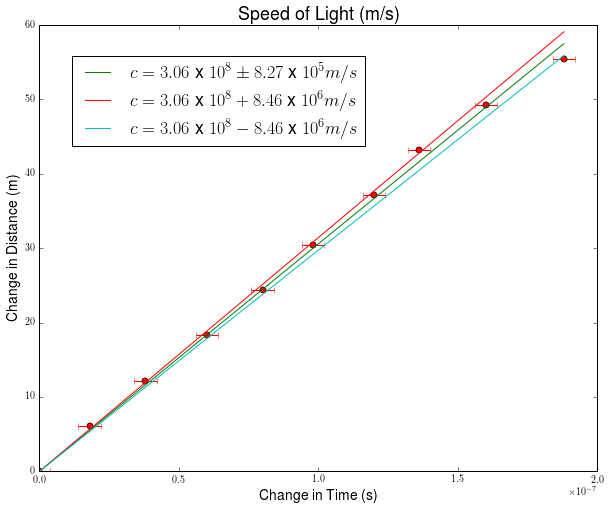

In [15]:
plt.plot (dt, dx, 'o')
plt.errorbar(dt, dx, fmt = 'ro', xerr=time_uncert, yerr = dist_uncert)
plt.xlim(0,2.0e-07)
plt.ylim(0,60)
plt.xlabel('Change in Time (s)', fontsize = 14)
plt.ylabel('Change in Distance (m)', fontsize = 14)
plt.title('Speed of Light (m/s)', fontsize = 18)
plt.plot(dt, linearFit(dt, fitParams[0]), label='$c=3.06$ x $10^8  \pm 8.27$ x $10^5  m/s$')
plt.plot(dt, linearFit(dt, fitParams[0]+3*sigma[0]), label='$c=3.06$ x $10^8+ 8.46$ x $10^6 m/s$')
plt.plot(dt, linearFit(dt, fitParams[0]-3*sigma[0]), label='$c=3.06$ x $10^8- 8.46$ x $10^6 m/s$')
plt.legend(bbox_to_anchor=(0.6,0.95), fontsize = 18)
plt.savefig('speedOfLightData.png', bbox_inches=0, dpi=600)

plt.show